# **LÓGICA FUZZY**

Na literatura o termo "lógica fuzzy"é usado de duas formas diferentes:

• teoria conjuntista a fim de manipular informações inexatas, nebulosas, por meio de
uma teoria de conjuntos fuzzy geral;

• lógica no sentido de "cálculo proposicional", de modo a estender a lógica
clássica.

*A lógica difusa tem por objetivo modelar modos de
raciocínio aproximados ao invés de precisos.*


• Na lógica difusa as proposições podem ter valores
intermediários entre "Verdadeiro" e "Falso". A veracidade
destas é uma função que pode assumir qualquer valor
entre 0 (absolutamente falso) e 1 (absolutamente
verdadeiro).

• As sentenças passam a ter um grau de pertinência.

**• Lógica Clássica**

o Predicados exigem definição exata
o Não existe resposta diferente de verdadeiro ou falso.
 é homem, é mortal, é par ...

**• Lógica Difusa**

o Predicados não possuem definição exata
o Respostas são relativas; Possuem um grau de
veracidade que variam entre “totalmente falso” e
“totalmente verdadeiro”:
é alto, está cansado, é jovem ...

**Exemplo de aplicação de Lógica Fuzzy em Python**

Conjuntos Fuzzy para o cálculo do ***Indicador de Necessidade de Auxílio Governamental Urgente para a Infância***

Conjunto Fuzzy de saída:
- Indicador de Necessidade de Auxílio Governamental Urgente para a Infância (Indu): Baixíssimo, Baixo, Mediano, Alto, Altíssimo

Conjuntos Fuzzy de entrada:
- perc_dom_pobres_var1 (Pdm): Baixíssimo, Baixo, Mediano, Alto, Altíssimo.
- IDH: Baixo, Médio, Alto


Então:

**SE** (Pdm é baixissimo) **E** (IDH é baixo) **ENTÃO** Indu é baixo

No sentido de criarmos um pequeno sistema fuzzy, determinaremos os limites possíveis para nossas variáveis nos seguintes termos:

a) Pdm: Percentual de domicílios pobres: entre  0% e 100%

b) IDH: entre 0 e 1  


c) Indu: saída do sistema, um indicador entre 0 e 100

Implementação de um sistema fuzzy

**Passo 1:**  Instalar o pacote scikit-fuzzy, que contem as bibliotecas fuzzy

In [1]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 11.0 MB/s eta 0:00:00


**Passo 2:** Instalar as bibliotecas necessárias para a criação do sistema:

In [2]:
import numpy as np


In [3]:
import skfuzzy as fuzz

In [4]:
from skfuzzy import control as ctrl

In [5]:
import matplotlib.pyplot as plt

**Passo 3:** Criar os ANTECEDENTES, que são as definições acerca das variáveis de entrada do sistema fuzzy

Variável  de entrada : Percentual de domicílios pobres no município

In [6]:
Pdm = ctrl.Antecedent(np.arange(0,100,1),'Pdm') # Limite inicial, limite final, passos de variação

In [8]:
IDH = ctrl.Antecedent(np.arange(0,1,0.001),'IDH')


In [9]:
Indu = ctrl.Consequent(np.arange(0,100,1),'Indu') # Limite inicial, limite final, incrementar em passos de 1



**Passo 4:** Criar faixas de classificação para as variáveis, com número de níveis e nomes

In [13]:
Pdm.automf(number=5, names=['baixissimo','baixo','mediano','alto','altissimo'])
IDH.automf(number=3, names=['baixo','medio','alto']) # Quanto maior a quantida de quilometros feitos por litro, melhor.

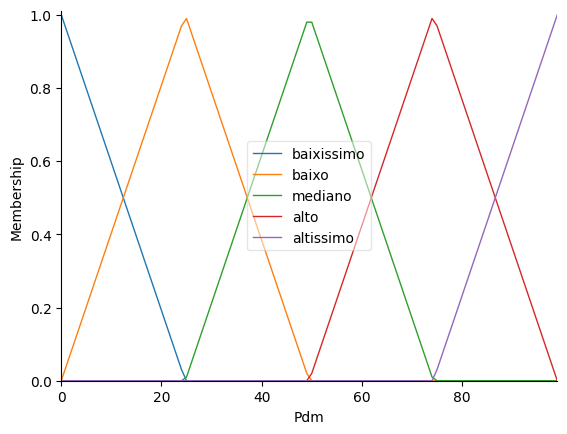

In [11]:
# Gerar gráficos do Percentual de domicílios pobres
Pdm.view()

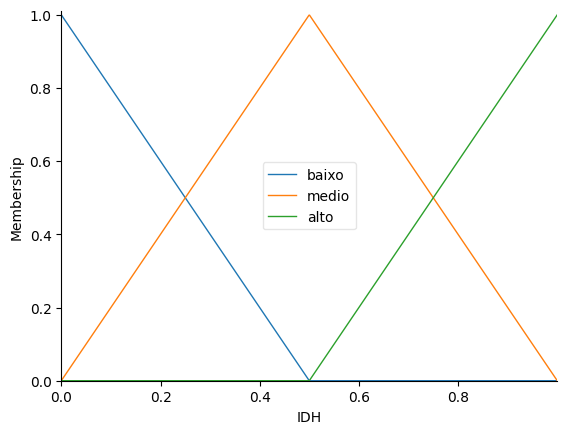

In [14]:
IDH.view()

**Passo 5:** Definir as classificações para o benefício (universo de valores possíveis para benefício)

In [17]:
# beneficio['baixo'] = fuzz.trimf(beneficio.universe,[0,2.5,5])
# beneficio['medio'] = fuzz.trimf(beneficio.universe,[2.5,5,7.5])
# beneficio['alto'] = fuzz.trimf(beneficio.universe,[5,7.5,10])

Indu['baixissimo'] = fuzz.trimf(Indu.universe,[0,10,30])
Indu['baixo'] = fuzz.trimf(Indu.universe,[10,30,40])
Indu['medio'] = fuzz.trimf(Indu.universe,[30,40,60])
Indu['alto'] = fuzz.trimf(Indu.universe,[40,60,80])
Indu['altissimo'] = fuzz.trimf(Indu.universe,[60,80,100])


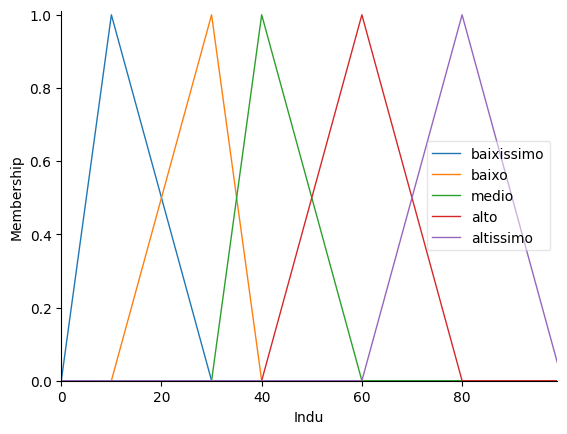

In [18]:
Indu.view()

**Passo 6:** Definição das regras

Neste ponto, os resultados da combinação das variáveis linguísticas (preço e consumo) são determinados pelo especialista

In [20]:
# SE (Pdm é baixissimo) E (IDH é baixo) ENTÃO Indu é baixo
regra1 = ctrl.Rule(Pdm['baixissimo'] & IDH['baixo'], Indu['baixo'])
regra2 = ctrl.Rule(Pdm['baixissimo'] & IDH['medio'], Indu['medio'])
regra3 = ctrl.Rule(Pdm['baixissimo'] & IDH['alto'], Indu['baixissimo'])
regra4 = ctrl.Rule(Pdm['baixo'] & IDH['baixo'], Indu['medio'])
regra5 = ctrl.Rule(Pdm['baixo'] & IDH['medio'], Indu['medio'])
regra6 = ctrl.Rule(Pdm['baixo'] & IDH['alto'], Indu['medio'])
regra7 = ctrl.Rule(Pdm['mediano'] & IDH['baixo'], Indu['medio'])
regra8 = ctrl.Rule(Pdm['mediano'] & IDH['medio'], Indu['medio'])
regra9 = ctrl.Rule(Pdm['mediano'] & IDH['alto'], Indu['alto'])
regra10 = ctrl.Rule(Pdm['alto'] & IDH['baixo'], Indu['alto'])
regra11 = ctrl.Rule(Pdm['alto'] & IDH['medio'], Indu['alto'])
regra12 = ctrl.Rule(Pdm['alto'] & IDH['alto'], Indu['alto'])
regra13 = ctrl.Rule(Pdm['altissimo'] & IDH['baixo'], Indu['altissimo'])
regra14 = ctrl.Rule(Pdm['altissimo'] & IDH['medio'], Indu['alto'])
regra15 = ctrl.Rule(Pdm['altissimo'] & IDH['alto'], Indu['alto'])
#


#regra3 = ctrl.Rule(preco['medio'] | consumo['baixo'], beneficio['medio'])
#regra4 = ctrl.Rule(preco['medio'] | consumo['medio'], beneficio['medio'])
#regra5 = ctrl.Rule(preco['medio'] | consumo['alto'], beneficio['medio'])
#regra6 = ctrl.Rule(preco['alto'] | consumo['medio'], beneficio['medio'])
#regra7 = ctrl.Rule(preco['alto'] | consumo['alto'], beneficio['baixo'])
#regra8 = ctrl.Rule(preco['baixo'] | consumo['alto'], beneficio['medio'])
#regra9 = ctrl.Rule(preco['alto'] | consumo['baixo'], beneficio['medio'])


Passo 7: Aplicação das regras no sistema fuzzy

In [24]:
regras_indicador = ctrl.ControlSystem([regra1,regra2,regra3,regra4,regra5,regra6,regra7,regra8,regra9,regra10,regra11,regra12,regra13,regra14,regra15])

In [25]:
Indicador = ctrl.ControlSystemSimulation(regras_indicador) # executa a lógica fuzzy

Testar as regras

In [26]:
Indicador.input['Pdm'] = 24


In [28]:
Indicador.input['IDH'] = 0.456
Indicador.compute() # executa a analise fuzzy

42.45014014591624


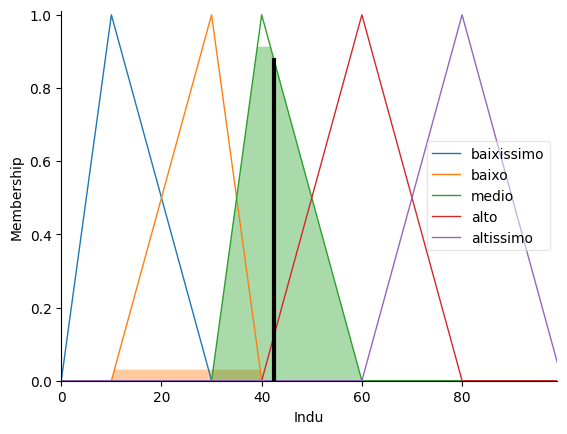

In [30]:
#print(recomendacao.output['beneficio'])
#beneficio.view(sim = recomendacao)
print(Indicador.output['Indu'])
Indu.view(sim = Indicador)

O resultado aponta o valor do  ***Indicador de Necessidade de Auxílio Governamental Urgente para a Infância***